# DataSpell tutorial 2 (JetBrains)

Developed after [this JetBrains’ tutorial](https://www.jetbrains.com/help/dataspell/set-up-environment-and-load-data.html#4b88d7d7).

## Read and inspect the dataset

In [3]:
import pandas as pd

# Read file
data = pd.read_csv('airlines.csv')
# data.head()
data

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,...,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,5843,27,23974,30060,61606,68335,118831,518,268764,19474
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,1623,3,7875,9639,20319,28189,24400,99,77167,4160
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,...,1245,15,6998,8287,13635,26810,17556,278,64480,6201
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,...,1562,14,7021,8670,14763,23379,23804,127,65865,3792
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,...,1100,18,5321,6513,13775,13712,20999,120,52747,4141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4403,SAN,"San Diego, CA: San Diego International",2016/01,1,January,2016,280,397,171,2,...,871,18,5030,6016,15482,23023,6021,79,46206,1601
4404,SEA,"Seattle, WA: Seattle/Tacoma International",2016/01,1,January,2016,357,513,351,2,...,1274,31,8330,9739,25461,32693,11466,73,74017,4324
4405,SFO,"San Francisco, CA: San Francisco International",2016/01,1,January,2016,560,947,2194,2,...,3825,20,8912,13206,43641,72557,153416,66,278610,8930
4406,SLC,"Salt Lake City, UT: Salt Lake City International",2016/01,1,January,2016,338,540,253,3,...,1175,14,7426,8699,32066,33682,8057,57,76978,3116


## Transform the data

### Select the columns of interest

In [13]:
airport_data = data[['Airport.Code', 'Statistics.Flights.Total', 'Statistics.Flights.Delayed', 'Statistics.Flights.Cancelled']]

# View the resulting DataFrame
print(airport_data.shape)
airport_data

(4408, 4)


,Airport.Code,Statistics.Flights.Total,Statistics.Flights.Delayed,Statistics.Flights.Cancelled
0,ATL,30060,5843,216
1,BOS,9639,1623,138
2,BWI,8287,1245,29
3,CLT,8670,1562,73
4,DCA,6513,1100,74
...,...,...,...,...
4403,SAN,6016,871,97
4404,SEA,9739,1274,104
4405,SFO,13206,3825,449
4406,SLC,8699,1175,84


### Group the data

In [14]:
# Group the data by airport code and summarize the values
airport_data = airport_data.groupby('Airport.Code').sum()
print(airport_data.shape)
airport_data

(29, 3)


,Statistics.Flights.Total,Statistics.Flights.Delayed,Statistics.Flights.Cancelled
Airport.Code,,,
ATL,5092841,1052410,86176
BOS,1491908,324595,38652
BWI,1300066,236712,17124
CLT,1542302,277619,23753
DCA,1051919,196691,29708
DEN,2773104,506238,35926
DFW,3636019,657588,80802
DTW,1725655,309430,29888
EWR,1670555,486592,54880


### Create new columns

In [15]:
# Assign variables
delayed = airport_data['Statistics.Flights.Delayed']
cancelled = airport_data['Statistics.Flights.Cancelled']
total = airport_data['Statistics.Flights.Total']

# Create new columns and fill them with values
airport_data['Ratio Delayed.Total']= delayed / total
airport_data['Ratio Cancelled.Total']= cancelled / total

# View DataFrame
airport_data

,Statistics.Flights.Total,Statistics.Flights.Delayed,Statistics.Flights.Cancelled,Ratio Delayed.Total,Ratio Cancelled.Total
Airport.Code,,,,,
ATL,5092841,1052410,86176,0.206645,0.016921
BOS,1491908,324595,38652,0.217570,0.025908
BWI,1300066,236712,17124,0.182077,0.013172
CLT,1542302,277619,23753,0.180003,0.015401
DCA,1051919,196691,29708,0.186983,0.028242
DEN,2773104,506238,35926,0.182553,0.012955
DFW,3636019,657588,80802,0.180854,0.022223
DTW,1725655,309430,29888,0.179312,0.017320
EWR,1670555,486592,54880,0.291276,0.032851


## Visualize the data

In [16]:
from matplotlib import pyplot as plt

### Sort DataFrame rows

In [45]:
airport_data = airport_data.sort_values(by='Ratio Delayed.Total', ascending=False)

### Assign variables

The `Airport.Code` column is the index column - airport codes are used as row addresses in this `DataFrame`, no need to specify the column name to read them.

In [52]:
airport_code = airport_data.index
delayed = airport_data['Ratio Delayed.Total']
cancelled = airport_data['Ratio Cancelled.Total']

### Create and plot a bar graph

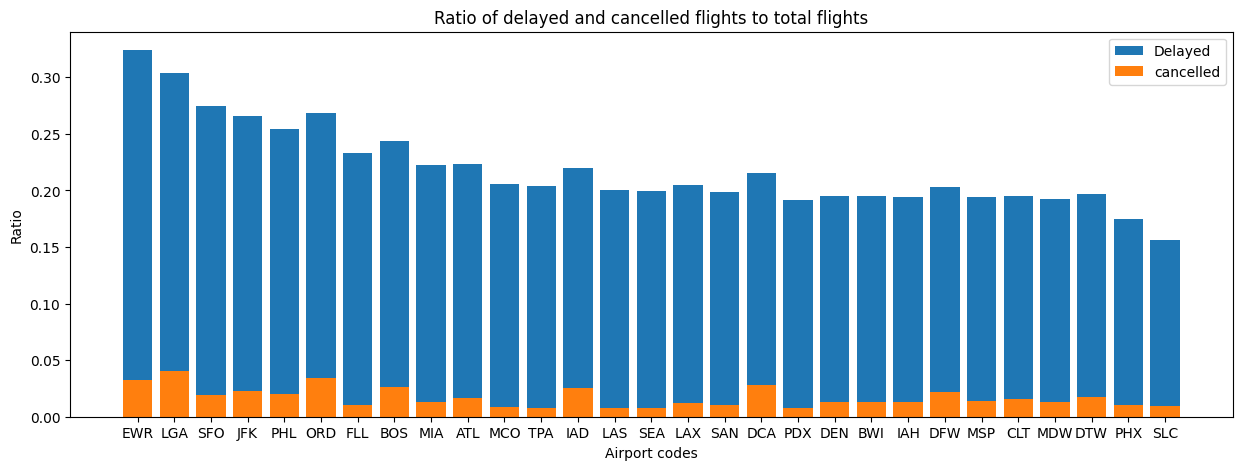

In [54]:
# Create a figure and set its size to 15x5 in.
fig, ax = plt.subplots(figsize=(15,5))

# Plot bar charts
ax.bar(airport_code, delayed[airport_code], bottom=cancelled[airport_code], label='Delayed')
ax.bar(airport_code, cancelled[airport_code], label='cancelled')

# Add axes labels and title
ax.set_xlabel('Airport codes')
ax.set_ylabel('Ratio')
ax.set_title('Ratio of delayed and cancelled flights to total flights')

# Show legend
ax.legend()

# Show plot
plt.show()

### Create and plot a line chart
Find out how the number of cancelled and delayed flights changed over time at the EWR airport.

Select the rows from data that have `EWR` in the `Airport.Code` column and put them into the `ewr_data` `DataFrame` for further processing.

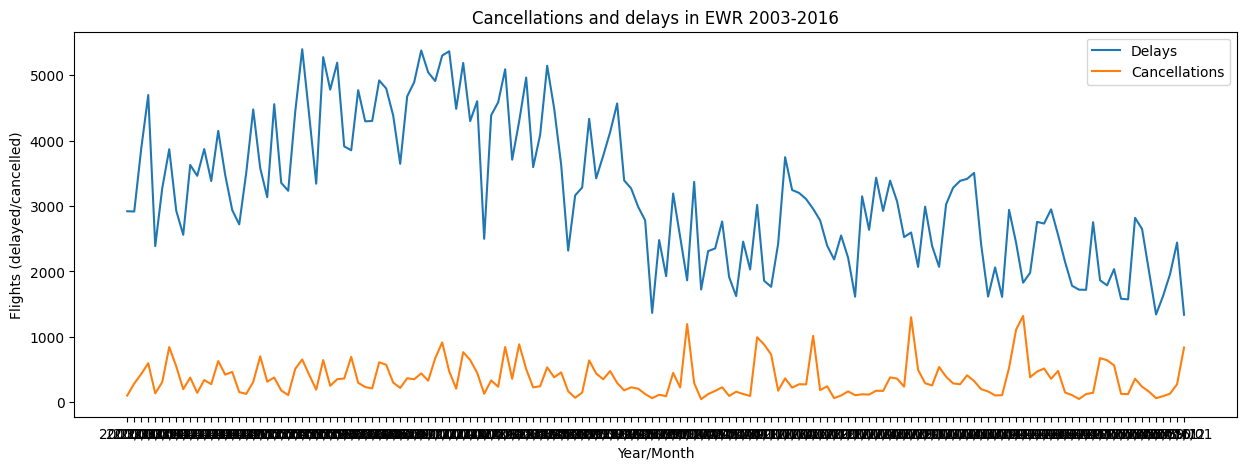

In [37]:
# Select rows with 'EWR' in the first column
ewr_data = data[data['Airport.Code']=='EWR']

# Assign variables
date = ewr_data['Time.Label']
delayed = ewr_data['Statistics.Flights.Delayed']
cancelled = ewr_data['Statistics.Flights.Cancelled']

# Create a figure and set its size to 15x5 in.
fig, ax = plt.subplots(figsize=(15,5))

# Plot line charts
ax.plot(date, delayed, label='Delays')
ax.plot(date, cancelled, label='Cancellations')

# Add axes labels
ax.set_xlabel('Year/Month')
ax.set_ylabel('Flights (delayed/cancelled)')

# Add title and legend
ax.set_title('Cancellations and delays in EWR 2003-2016')
ax.legend()

# Show plot
plt.show()

### Add another line chart to an existing one
Add another line chart with the total number of flights. But that numbers are far greater than delays. The solution is to add another Axes that will share the same x-axis but have its own y-axis. That can be done by using the `twinx()` method.

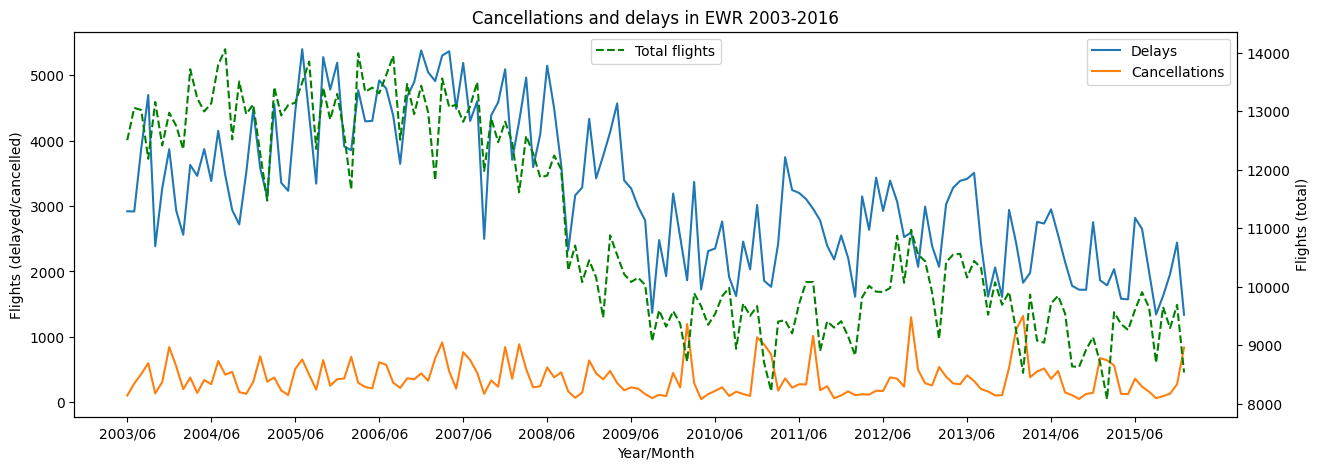

In [41]:
# Create the figure again in spite of the fact that it was already created above (must be done for some reasons, otherwise it doesn't work) and set its size to 15x5 in.
fig, ax = plt.subplots(figsize=(15,5))

# Plot line charts
ax.plot(date, delayed, label='Delays')
ax.plot(date, cancelled, label='Cancellations')

# Add axes labels
ax.set_xlabel('Year/Month')
ax.set_ylabel('Flights (delayed/cancelled)')

# Add title and legend
ax.set_title('Cancellations and delays in EWR 2003-2016')
ax.legend()

# Decrease the density of ticks on x-axis
ax.set_xticks(date[::12])

# Plot another chart with extra y-axis
ax2=ax.twinx()
ax2.plot(date, total, '--', color='g', label='Total flights')
ax2.set_ylabel('Flights (total)')
# Add legend in center
ax2.legend(loc='upper center')

# Show plot
plt.show()

### Get another view of the data
Group the rows of the `data` `DataFrame` by the `Time` label in YYYY/MM format, and then summarize the values. There will be invalid values in some columns (like `Time.Month` and `Time.Year`), but they won't be used here.

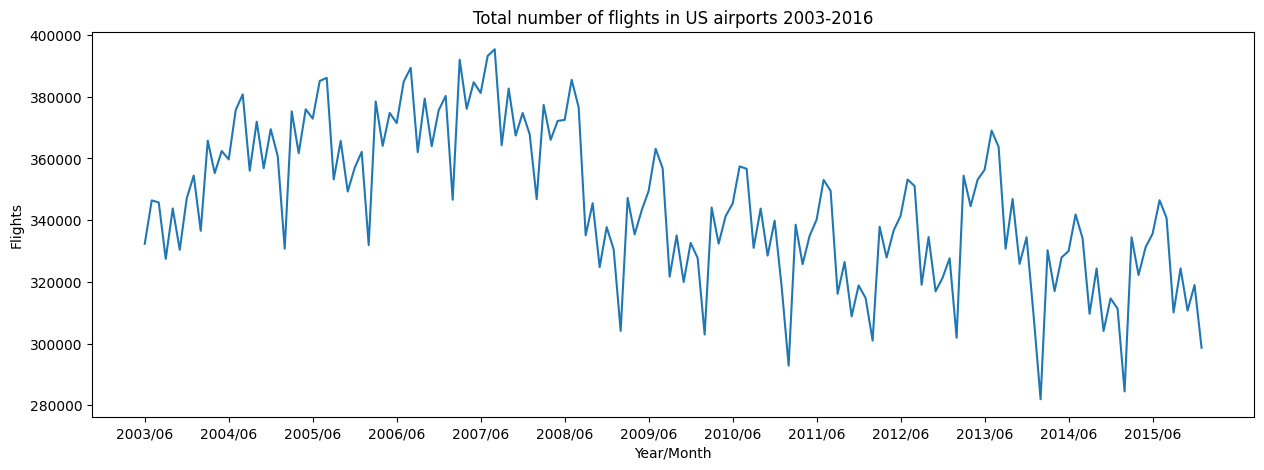

In [42]:
# Group data by date and summarize the values
monthly_data = data.groupby('Time.Label').sum()

# Assign variables
date = monthly_data.index # Date
total = monthly_data['Statistics.Flights.Total'] # Total number of flights

# Create a figure and set its size to 15x5 in.
fig, ax = plt.subplots(figsize=(15,5))

# Plot a line chart
ax.plot(date, total)
# Decrease the density of ticks on x-axis
ax.set_xticks(date[::12])
# Add title and axes labels
ax.set_title('Total number of flights in US airports 2003-2016')
ax.set_xlabel('Year/Month')
ax.set_ylabel('Flights')

# Show plot
plt.show()

Examine also how did the total number of flights change throughout the year. This time group the data by month name. The `sort_values(by='Time.Month')` part is needed to range the months in chronological order.

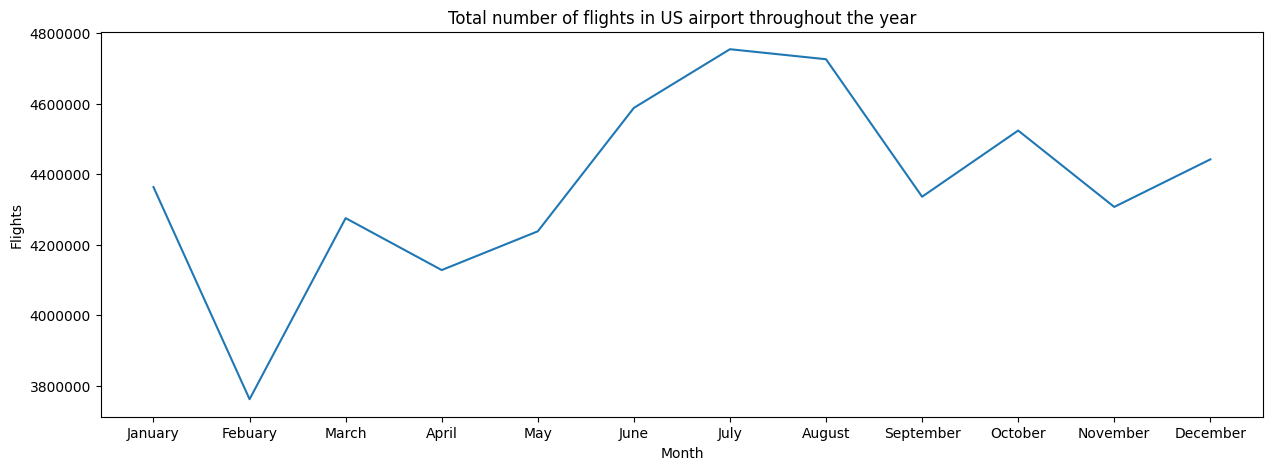

In [43]:
# Group data by month, summarize values, and place months in correct order
seasonal_data = data.groupby('Time.Month Name').sum().sort_values(by='Time.Month')

# Assign variables
month = seasonal_data.index
total = seasonal_data['Statistics.Flights.Total']

# Create a figure and set its size to 15x5 in.
fig, ax = plt.subplots(figsize=(15,5))

# Plot a line chart
ax.plot(month, total)
# Add title and axes labels
ax.set_title('Total number of flights in US airport throughout the year')
ax.set_xlabel('Month')
ax.set_ylabel('Flights')
# Disable scientific notation for y-axis
ax.ticklabel_format(axis='y', style='plain')

# Show plot
plt.show()